Isolation Forest Model Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       180
           1       0.31      0.40      0.35        20

    accuracy                           0.85       200
   macro avg       0.62      0.65      0.63       200
weighted avg       0.87      0.85      0.86       200

Confusion Matrix:
 [[162  18]
 [ 12   8]]

One-Class SVM Model Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78       180
           1       0.16      0.55      0.25        20

    accuracy                           0.67       200
   macro avg       0.55      0.61      0.52       200
weighted avg       0.85      0.67      0.73       200

Confusion Matrix:
 [[122  58]
 [  9  11]]


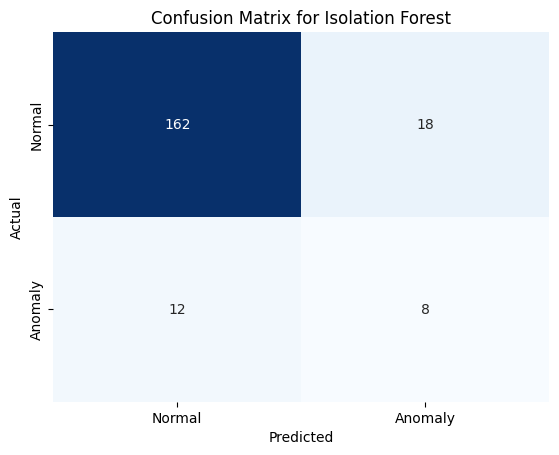

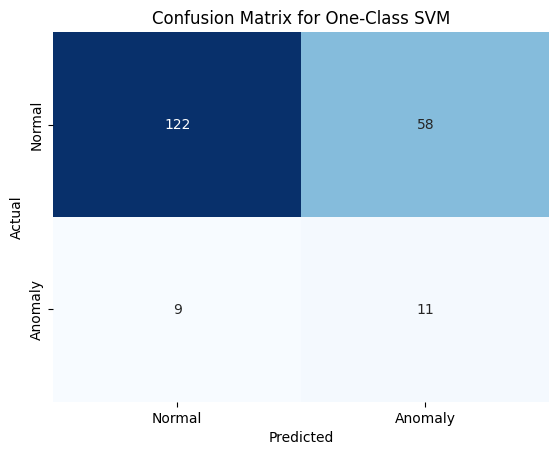

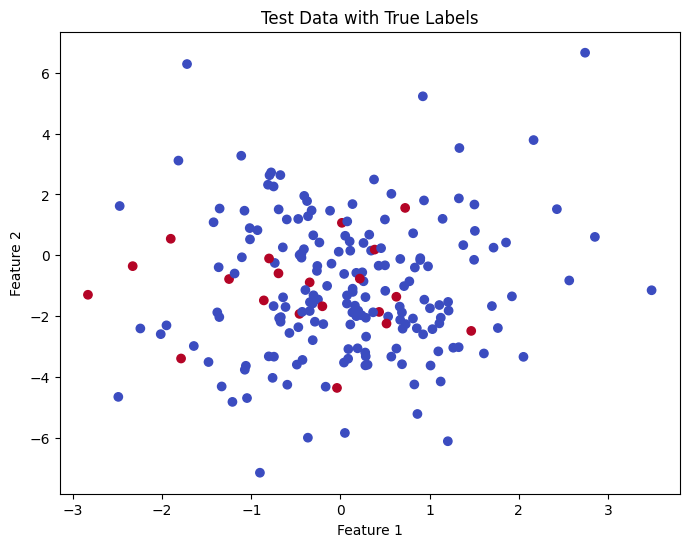

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# Step 1: Load the dataset
# You can use the KDD Cup 1999 dataset or use sklearn to create a synthetic dataset for simplicity
# Let's create a synthetic dataset for anomaly detection:

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=1,
                            weights=[0.9], flip_y=0, random_state=42)

# In this synthetic dataset, the normal class will be majority class (0), and anomalies will be class (1).

# Step 2: Data Preprocessing
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Model Training
# We'll use three different anomaly detection algorithms

# Model 1: Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)

# Model 2: One-Class SVM
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
ocsvm.fit(X_train_scaled)

# Step 4: Predictions
# For Isolation Forest
y_pred_iso_forest = iso_forest.predict(X_test_scaled)
y_pred_iso_forest = np.where(y_pred_iso_forest == 1, 0, 1)  # Converting the prediction (-1, 1) to (0, 1)

# For One-Class SVM
y_pred_ocsvm = ocsvm.predict(X_test_scaled)
y_pred_ocsvm = np.where(y_pred_ocsvm == 1, 0, 1)  # Converting the prediction (-1, 1) to (0, 1)

# Step 5: Evaluation
print("Isolation Forest Model Evaluation:")
print(classification_report(y_test, y_pred_iso_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso_forest))

print("\nOne-Class SVM Model Evaluation:")
print(classification_report(y_test, y_pred_ocsvm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ocsvm))

# Step 6: Visualization
# Visualizing the confusion matrix for both models

def plot_confusion_matrix(cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices for both models
plot_confusion_matrix(confusion_matrix(y_test, y_pred_iso_forest), 'Isolation Forest')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_ocsvm), 'One-Class SVM')

# Step 7: Visualizing Data
# Plotting the first two features of the dataset for better understanding
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='o', label='Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data with True Labels')
plt.show()
